In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import umap
from sklearn.impute import KNNImputer
from sklearn.linear_model import LassoCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.utils import shuffle

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

In [34]:
df0 = pd.read_csv('E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim1_2_merged1_baidu.csv')
df0

,subject_id,hadm_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,"Blood Gas~Blood~Hematocrit, Calculated~50810~%",Blood Gas~Blood~Hemoglobin~50811~g/dL,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~Methemoglobin~50814~%,Blood Gas~Blood~O2 Flow~50815~L/min,Blood Gas~Blood~Oxygen~50816~%,Blood Gas~Blood~Oxygen Saturation~50817~%,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~PEEP~50819~,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,"Blood Gas~Blood~Potassium, Whole Blood~50822~mEq/L",Blood Gas~Blood~Required O2~50823~,"Blood Gas~Blood~Sodium, Whole Blood~50824~mEq/L",Blood Gas~Blood~Temperature~50825~,Blood Gas~Blood~Tidal Volume~50826~,Chemistry~Blood~% Hemoglobin A1c~50852~%,Chemistry~Blood~25-OH Vitamin D~50853~ng/mL,Chemistry~Blood~Acetaminophen~50856~ug/mL,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Alpha-Fetoprotein~50864~ng/mL,Chemistry~Blood~Amikacin~50865~ug/mL,Chemistry~Blood~Ammonia~50866~umol/L,Chemistry~Blood~Amylase~50867~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Anti-DGP (IgA/IgG)~50869~units,"Chemistry~Blood~Anti-Gliadin Antibody, IgA~50870~units",Chemistry~Blood~Anti-Thyroglobulin Antibodies~50877~IU/mL,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Beta-2 Microglobulin~50881~mg/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Direct~50883~mg/dL","Chemistry~Blood~Bilirubin, Indirect~50884~mg/dL","Chemistry~Blood~Bilirubin, Total~50885~mg/dL",Chemistry~Blood~C-Reactive Protein~50889~mg/L_,Chemistry~Blood~C3~50890~mg/dL,Chemistry~Blood~C4~50891~mg/dL,...,Hematology~Blood~dRVVT - Confirmation~52107~,Hematology~Blood~dRVVT - Normalized Ratio~52108~,Hematology~Blood~dRVVT - Screen~52109~,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Blood~SCT - Confirmation~52177~,Hematology~Blood~SCT - Normalized Ratio~52178~,Hematology~Blood~SCT - Screen~52179~,Hematology~Cerebrospinal Fluid~Atypical Lymphocytes~52221~%,Hematology~Cerebrospinal Fluid~Bands~52223~%,Hematology~Cerebrospinal Fluid~Basophils~52225~%,Hematology~Cerebrospinal Fluid~Blasts~52227~%,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,"Hematology~Cerebrospinal Fluid~Hematocrit, CSF~52257~%",Hematology~Cerebrospinal Fluid~Lining Cell~52263~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Mesothelial cells~52268~%,Hematology~Cerebrospinal Fluid~Metamyelocytes~52270~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Myelocytes~52274~%,Hematology~Cerebrospinal Fluid~NRBC~52276~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",Hematology~Cerebrospinal Fluid~Young~52288~%,Hematology~Blood~Absolute Lymphocyte Count~52769~#/uL,gender,age,culture,long_title,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,Allergies,Chief Complaint,History of Present Illness,Past Medical History,Family History,hospital_expire_flag
0,10001217,24597018.0,2157-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [35]:
for each in df0.columns.tolist():
    if 'ph' in each.lower():
        print(each)

Blood Gas~Blood~pH~50820~units
Chemistry~Blood~Acetaminophen~50856~ug/mL
Chemistry~Blood~Alkaline Phosphatase~50863~IU/L
Chemistry~Blood~Alpha-Fetoprotein~50864~ng/mL
Chemistry~Blood~Phenobarbital~50966~ug/mL
Chemistry~Blood~Phenytoin~50967~ug/mL
Chemistry~Blood~Phenytoin, Free~50968~ug/mL
Chemistry~Blood~Phenytoin, Percent Free~50969~%
Chemistry~Blood~Phosphate~50970~mg/dL
Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_
Hematology~Blood~Atypical Lymphocytes~51143~%
Hematology~Blood~Basophils~51146~%
Hematology~Blood~Eosinophil Count~51199~#/uL
Hematology~Blood~Eosinophils~51200~%
Hematology~Blood~Hypersegmented Neutrophils~51232~%
Hematology~Blood~Lymphocytes~51244~%
Hematology~Blood~Lymphocytes, Percent~51245~%
Hematology~Blood~Neutrophils~51256~%
Chemistry~Blood~Treponema pallidum (syphilis) value~51749~
Hematology~Blood~Absolute Basophil Count~52069~K/uL_
Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_
Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_
Hematology~

In [36]:
pd.set_option('display.max_columns',100)

In [37]:
df0.culture.value_counts()

0    11582
1      277
Name: culture, dtype: int64

In [38]:
df1 = pd.concat([df0.iloc[:,:-18],df0.iloc[:,-14:-6],df0.iloc[:,-18:-17]],axis=1)
df1 = df1.iloc[:,3:]
df1

,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,"Blood Gas~Blood~Hematocrit, Calculated~50810~%",Blood Gas~Blood~Hemoglobin~50811~g/dL,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~Methemoglobin~50814~%,Blood Gas~Blood~O2 Flow~50815~L/min,Blood Gas~Blood~Oxygen~50816~%,Blood Gas~Blood~Oxygen Saturation~50817~%,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~PEEP~50819~,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,"Blood Gas~Blood~Potassium, Whole Blood~50822~mEq/L",Blood Gas~Blood~Required O2~50823~,"Blood Gas~Blood~Sodium, Whole Blood~50824~mEq/L",Blood Gas~Blood~Temperature~50825~,Blood Gas~Blood~Tidal Volume~50826~,Chemistry~Blood~% Hemoglobin A1c~50852~%,Chemistry~Blood~25-OH Vitamin D~50853~ng/mL,Chemistry~Blood~Acetaminophen~50856~ug/mL,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Alpha-Fetoprotein~50864~ng/mL,Chemistry~Blood~Amikacin~50865~ug/mL,Chemistry~Blood~Ammonia~50866~umol/L,Chemistry~Blood~Amylase~50867~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Anti-DGP (IgA/IgG)~50869~units,"Chemistry~Blood~Anti-Gliadin Antibody, IgA~50870~units",Chemistry~Blood~Anti-Thyroglobulin Antibodies~50877~IU/mL,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Beta-2 Microglobulin~50881~mg/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Direct~50883~mg/dL","Chemistry~Blood~Bilirubin, Indirect~50884~mg/dL","Chemistry~Blood~Bilirubin, Total~50885~mg/dL",Chemistry~Blood~C-Reactive Protein~50889~mg/L_,Chemistry~Blood~C3~50890~mg/dL,Chemistry~Blood~C4~50891~mg/dL,Chemistry~Blood~CA-125~50892~U/mL,"Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Calculated Free Testosterone~50894~pg/mL,...,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL",Chemistry~Cerebrospinal Fluid~HIV 1 Viral Load~51791~log10 copies/mL,"Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL","Blood Gas~Blood~Creatinine, Whole Blood~52024~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~dRVVT - Confirmation~52107~,Hematology~Blood~dRVVT - Normalized Ratio~52108~,Hematology~Blood~dRVVT - Screen~52109~,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Blood~SCT - Confirmation~52177~,Hematology~Blood~SCT - Normalized Ratio~52178~,Hematology~Blood~SCT - Screen~52179~,Hematology~Cerebrospinal Fluid~Atypical Lymphocytes~52221~%,Hematology~Cerebrospinal Fluid~Bands~52223~%,Hematology~Cerebrospinal Fluid~Basophils~52225~%,Hematology~Cerebrospinal Fluid~Blasts~52227~%,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,"Hematology~Cerebrospinal Fluid~Hematocrit, CSF~52257~%",Hematology~Cerebrospinal Fluid~Lining Cell~52263~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Mesothelial cells~52268~%,Hematology~Cerebrospinal Fluid~Metamyelocytes~52270~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Myelocytes~52274~%,Hematology~Cerebrospinal Fluid~NRBC~52276~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fl

In [39]:
df1_0 = df1[df1['culture']==0]
df1_0 = df1_0.dropna(thresh=len(df1_0)*0.1, axis=1)
df1_0

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatine Kinase (CK)~50910~IU/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,culture
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,5.0,0.0,F,55,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,85.0,14.0,30.0,26.0,0.3,NaN,108.0,NaN,0.7,92.0,NaN,NaN,NaN,NaN,NaN,3.7,144.0,15.0,NaN,0.2,0.2,35.4,11.7,1.1,21.9,30.4,33.0,92.0,3.8,74.0,226.0,13.0,27.5,15.0,3.83,6.7,NaN,55.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,2.0,1.0,F,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,0.8,NaN,NaN,NaN,25.0,3.6,78.0,13.0,26.0,21.0,1.0,7.8,107.0,89.0,0.6,95.0,NaN,NaN,187.0,1.8,4.1,3.7,137.0,10.0,NaN,0.1,0.1,36.7,12.6,NaN,11.2,30.5,34.3,89.0,5.9,82.7,198.0,NaN,NaN,12.3,4.13,12.7,NaN,61.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,2.0,32.0,17.0,334.0,4.0,M,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,NaN,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,NaN,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,3

In [40]:
df1_1 = df1[df1['culture']==1]
df1_1 = df1_1.dropna(thresh=len(df1_1)*0.1, axis=1)
df1_1

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,"Blood Gas~Blood~Potassium, Whole Blood~50822~mEq/L",Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Lipase~50956~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Chemistry~Blood~Vancomycin~51009~ug/mL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Atypical Lymphocytes~51143~%,Hematology~Blood~Bands~51144~%,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Metamyelocytes~51251~%,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Myelocytes~51255~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,culture
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,30.0,0.0,7.0,0.0,29.0,0.0,M,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
78,20.0,49.0,0.88,3.0,58.0,7.52,68.0,3.3,27.0,4.1,59.0,25.0,77.0,40.0,0.4,7.9,80.0,6.5,127.0,168.0,0.0,NaN,119.0,2.6,10.7,3.9,145.0,74.0,16.5,1.34,NaN,NaN,0.1,0.1,40.2,13.6,1.2,7.0,31.5,33.8,93.0,NaN,11.3,NaN,80.9,240.0,12.5,22.6,13.1,4.32,19.3,38.0,112.0,NaN,11100.0,0.02,0.02,2.17,15.6,0.6,44.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,23.0,NaN,NaN,105.0,0.8,124.0,NaN,NaN,NaN,NaN,NaN,NaN,4.5,140.0,18.0,NaN,NaN,NaN,NaN,0.7,2.3,38.5,13.8,1.1,16.0,30.1,35.9,84.0,NaN,3.5,NaN,77.5,184.0,11.8,28.2,13.8,4.59,8.3,NaN,76.0,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN,7.0,NaN,1.0,0.0,2.0,M,61,99.0,80.0,18.

In [41]:
# The intersection of two categories
col0 = set(df1_0)
col1 = set(df1_1)
cols_intersection = list(col0 & col1)

# After intersection, the order of columns is changed and corrected to the original order
cols_intersection_order = []
for each in df1_1.columns:
    if each in cols_intersection:
        cols_intersection_order.append(each)
    else:
        continue

print(len(cols_intersection_order))
df1 = df1[cols_intersection_order]
df1

70


,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,culture
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,5.0,0.0,F,55,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,85.0,14.0,30.0,26.0,0.3,NaN,108.0,0.7,92.0,NaN,NaN,NaN,NaN,NaN,3.7,144.0,15.0,NaN,0.2,0.2,35.4,11.7,1.1,21.9,30.4,33.0,92.0,3.8,74.0,226.0,13.0,27.5,15.0,3.83,6.7,NaN,55.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,2.0,1.0,F,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,0.8,NaN,NaN,NaN,25.0,3.6,78.0,13.0,26.0,21.0,1.0,7.8,107.0,0.6,95.0,NaN,NaN,187.0,1.8,4.1,3.7,137.0,10.0,NaN,0.1,0.1,36.7,12.6,NaN,11.2,30.5,34.3,89.0,5.9,82.7,198.0,NaN,NaN,12.3,4.13,12.7,NaN,61.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,2.0,32.0,17.0,334.0,4.0,M,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,

In [42]:
df11 = df1.copy()
df11 = df11.dropna(thresh=int(df11.shape[0]*0.0),axis=1)
df11

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,culture
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,5.0,0.0,F,55,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,85.0,14.0,30.0,26.0,0.3,NaN,108.0,0.7,92.0,NaN,NaN,NaN,NaN,NaN,3.7,144.0,15.0,NaN,0.2,0.2,35.4,11.7,1.1,21.9,30.4,33.0,92.0,3.8,74.0,226.0,13.0,27.5,15.0,3.83,6.7,NaN,55.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,2.0,1.0,F,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,0.8,NaN,NaN,NaN,25.0,3.6,78.0,13.0,26.0,21.0,1.0,7.8,107.0,0.6,95.0,NaN,NaN,187.0,1.8,4.1,3.7,137.0,10.0,NaN,0.1,0.1,36.7,12.6,NaN,11.2,30.5,34.3,89.0,5.9,82.7,198.0,NaN,NaN,12.3,4.13,12.7,NaN,61.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,2.0,32.0,17.0,334.0,4.0,M,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,

In [43]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11859 entries, 0 to 11858
Data columns (total 70 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Blood Gas~Blood~Base Excess~50802~mEq/L                               1524 non-null   float64
 1   Blood Gas~Blood~Calculated Total CO2~50804~mEq/L                      1524 non-null   float64
 2   Blood Gas~Blood~Lactate~50813~mmol/L                                  2896 non-null   float64
 3   Blood Gas~Blood~pCO2~50818~mm Hg                                      1524 non-null   float64
 4   Blood Gas~Blood~pH~50820~units                                        1595 non-null   float64
 5   Blood Gas~Blood~pO2~50821~mm Hg                                       1524 non-null   float64
 6   Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L             4188 non-null   float64


In [44]:
df12 = df11.copy()
df12 = df12.dropna(thresh=int(df12.shape[1]*0.40), axis=0)
df12

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,culture
1,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,85.0,14.0,30.0,26.0,0.3,NaN,108.0,0.7,92.0,NaN,NaN,NaN,NaN,NaN,3.7,144.0,15.0,NaN,0.2,0.2,35.4,11.7,1.1,21.9,30.4,33.0,92.0,3.8,74.0,226.0,13.0,27.5,15.0,3.83,6.7,NaN,55.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,2.0,1.0,F,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,0.8,NaN,NaN,NaN,25.0,3.6,78.0,13.0,26.0,21.0,1.0,7.8,107.0,0.6,95.0,NaN,NaN,187.0,1.8,4.1,3.7,137.0,10.0,NaN,0.1,0.1,36.7,12.6,NaN,11.2,30.5,34.3,89.0,5.9,82.7,198.0,NaN,NaN,12.3,4.13,12.7,NaN,61.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,2.0,32.0,17.0,334.0,4.0,M,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,38.0,0.0,510.0,1.0,M,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,1.2,NaN,NaN,NaN,13.0,4.9,80.0,15.0,20.0,18.0,1.0,NaN,95.0,1.0,111.0,12.0,2.0,NaN,NaN,NaN,4.6,128.0,15.0,0.66,0.2,0.0,30.9,8.4,NaN,6.6,18.0,27.2,66.0,7.7,85.1,225.0,NaN,NaN,20.1,4.66,10.0,1

In [45]:
df12.culture.value_counts()

0    9065
1     247
Name: culture, dtype: int64

In [46]:
df_aim1_unLASSOed = df12.copy()
df_aim1_unLASSOed['gender'] = df_aim1_unLASSOed['gender'].map({'M':0,'F':1})
df_aim1_unLASSOed.info()
# df_aim1_unLASSOed.to_csv("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim1_unLASSOed.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9312 entries, 1 to 11857
Data columns (total 70 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Blood Gas~Blood~Base Excess~50802~mEq/L                               1505 non-null   float64
 1   Blood Gas~Blood~Calculated Total CO2~50804~mEq/L                      1505 non-null   float64
 2   Blood Gas~Blood~Lactate~50813~mmol/L                                  2836 non-null   float64
 3   Blood Gas~Blood~pCO2~50818~mm Hg                                      1505 non-null   float64
 4   Blood Gas~Blood~pH~50820~units                                        1569 non-null   float64
 5   Blood Gas~Blood~pO2~50821~mm Hg                                       1505 non-null   float64
 6   Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L             4126 non-null   float64
 

# Null-filling, resampling, normalisation

In [47]:
df2 = df_aim1_unLASSOed.copy()

In [48]:
columns = df2.columns
index = df2.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df2 = imputer.fit_transform(df2)
# change to DataFrame
df2 = pd.DataFrame(df2, columns=columns, index=index)
df2['culture'] = df2['culture'].astype(np.int16)
df2

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,culture
1,-0.380459,23.258091,1.370865,32.434471,7.446346,109.174227,22.000000,4.177188,85.000000,14.000000,30.000000,26.000000,0.300000,8.474574,108.00000,0.700000,92.000000,7.492786,1.191170,188.895813,1.756204,2.852350,3.700000,144.000000,15.000000,1.567263,0.200000,0.200000,35.4,11.7,1.100000,21.900000,30.4,33.0,92.0,3.800000,74.000000,226.0,13.000000,27.500000,15.0,3.83,6.7,6.223710,55.0,18.851504,29.0,0.041312,0.128239,0.562294,5.879125,0.483956,44.059507,100.0,8.923758,0.0,0.0,2.0,1.0,1.0,77.0,97.915930,73.046502,16.409132,97.621147,139.058244,70.988197,0.000000,1.972467,0
2,-2.914700,21.918795,0.800000,35.185491,7.387609,132.878959,25.000000,3.600000,78.000000,13.000000,26.000000,21.000000,1.000000,7.800000,107.00000,0.600000,95.000000,32.385132,1.000000,187.000000,1.800000,4.100000,3.700000,137.000000,10.000000,1.416140,0.100000,0.100000,36.7,12.6,1.049490,11.200000,30.5,34.3,89.0,5.900000,82.700000,198.0,11.451075,27.391248,12.3,4.13,12.7,9.239205,61.0,17.574101,24.0,0.033344,0.049051,0.993913,8.034454,0.643759,40.647590,43.0,2.000000,32.0,17.0,334.0,4.0,0.0,21.0,99.483419,92.562102,18.465256,98.483245,125.607582,72.019403,4.283409,2.799927,0
3,1.270182,26.717183,1.378632,39.326598,7.419972,134.988508,44.553474,2.600000,191.617142,14.000000,42.496768,26.000000,0.513617,10.400000,102.00000,1.200000,76.000000,7.328936,0.875803,303.045622,1.900000,2.800000,4.900000,137.000000,32.000000,1.918403,0.063063,1.538

In [49]:
# Separate features and labels
data_X = df2.iloc[:, :-1]
data_y = df2.iloc[:, -1]

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter 
# smote = SMOTE()
# data_X, data_y = smote.fit_resample(data_X, data_y)

from imblearn.under_sampling import RandomUnderSampler
proportion = 1/1
rus = RandomUnderSampler(sampling_strategy=proportion, random_state=1131)
data_X, data_y = rus.fit_resample(data_X, data_y)

data_X, data_y = shuffle(data_X, data_y, random_state=41)

In [53]:
# Data normalisation
cols = data_X.columns
index = data_X.index

scaler = StandardScaler()
data_X = scaler.fit_transform(data_X)

data_X = pd.DataFrame(data_X, columns=cols, index=index)
data_X

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
116,0.628351,0.781645,0.558809,0.862901,-0.134467,0.655452,-0.223097,-0.281569,1.688249,0.654722,-0.106870,-0.431066,-0.014646,0.832768,-0.728648,-0.444011,3.950626,0.286038,0.505893,0.191909,-0.898717,-0.588070,0.148179,-0.967257,-0.491312,-0.248238,1.514426,7.670830,0.764360,0.392436,-2.206077,1.503653,-1.382235,-1.156240,-0.804129,-0.868433,-1.980872,0.115230,-2.105736,-0.275079,-0.602569,0.948871,-0.477362,1.598511,3.101167,-0.389473,-0.194568,-0.726965,-0.281002,-0.525610,-0.378362,-0.589503,-0.215024,0.830772,1.279156,-0.961237,-0.839243,-0.107077,-0.221705,1.032931,-0.634058,-0.228366,0.331593,0.307372,0.157733,0.122130,-0.075921,0.197271,1.010933
347,-0.583962,-0.715382,-0.724783,-0.595423,-0.016899,0.427649,0.632070,0.253491,0.552220,-0.037141,0.017208,0.652288,-0.361691,-0.486782,-0.551389,-0.331299,-0.450645,-0.286714,0.481921,-0.238781,-1.706092,-0.211675,-1.189546,-0.123221,-0.172783,0.151460,0.623126,-0.110142,0.702493,1.014129,-0.440784,0.563964,0.076504,1.267557,-0.651238,-0.776467,-0.187333,-0.074225,-0.314665,-0.494808,-0.701736,0.863882,0.222854,-0.506852,-0.092885,-0.433587,-0.164031,0.653482,0.618008,1.043100,0.108176,0.057228,-1.050789,1.112163,-0.389384,-0.598445,-0.604812,-0.105029,-0.222294,1.032931,-0.224767,0.387022,0.566384,0.944204,0.763671,-0.322377,0.067359,0.319485,1.379670
210,0.102880,0.227071,1.686525,0.608058,0.956116,-0.719540,-0.154251,-1.150663,-0.968321,-1.074936,-0.112974,2.5

# LASSO Selection Characteristics

In [54]:
X = data_X.copy()
y = data_y.copy()

In [55]:
feature_names = X.columns

# Set up the LASSO regression model and use cross-validation to select the best alpha
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=50000)

# Training models
lasso_cv.fit(X, y)

# Get the best alpha value
alpha = lasso_cv.alpha_
print(f'Optimal alpha: {alpha}')

# Get the selected feature index
coefs = lasso_cv.coef_
selected_features_indices = np.where(coefs != 0)[0]

# Get selected feature column names from saved feature names
selected_feature_names = feature_names[selected_features_indices]
print(selected_features_indices)
print(f'Selected features: {list(selected_feature_names)}')

Optimal alpha: 0.02108354075325109
[ 5  7 15 16 17 18 19 22 23 29 31 33 35 37 39 44 46 49 51 52 53 54 56 63
 67 68]
Selected features: ['Blood Gas~Blood~pO2~50821~mm Hg', 'Chemistry~Blood~Albumin~50862~g/dL', 'Chemistry~Blood~Creatinine~50912~mg/dL', 'Chemistry~Blood~Glucose~50931~mg/dL', 'Chemistry~Blood~H~50934~_U', 'Chemistry~Blood~I~50947~_U', 'Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L', 'Chemistry~Blood~Potassium~50971~mEq/L', 'Chemistry~Blood~Sodium~50983~mEq/L', 'Hematology~Blood~Hemoglobin~51222~g/dL', 'Hematology~Blood~Lymphocytes~51244~%', 'Hematology~Blood~MCHC~51249~%_g/dL', 'Hematology~Blood~Monocytes~51254~%', 'Hematology~Blood~Platelet Count~51265~K/uL', 'Hematology~Blood~PTT~51275~sec', 'Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL', 'Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL', 'Hematology~Blood~Absolute Monocyte Count~52074~K/uL_', 'Hematology~Blood~Immature Granulocytes~52135~%', 'Hematology~Blood~RDW-SD~52172~fL_', 'Hematology

In [56]:
X[selected_feature_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 116 to 448
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Blood Gas~Blood~pO2~50821~mm Hg                               494 non-null    float64
 1   Chemistry~Blood~Albumin~50862~g/dL                            494 non-null    float64
 2   Chemistry~Blood~Creatinine~50912~mg/dL                        494 non-null    float64
 3   Chemistry~Blood~Glucose~50931~mg/dL                           494 non-null    float64
 4   Chemistry~Blood~H~50934~_U                                    494 non-null    float64
 5   Chemistry~Blood~I~50947~_U                                    494 non-null    float64
 6   Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L         494 non-null    float64
 7   Chemistry~Blood~Potassium~50971~mEq/L                         494 non

In [57]:
selected_feature_names1 = selected_feature_names.tolist().copy()
selected_feature_names1.append('culture')
df_aim1_LASSOed = df_aim1_unLASSOed[selected_feature_names1]
name_short = ['B_pO2','B_Albumin','B_Creatinine','B_Glucose','B_H','B_I','B_LactateDehydrogenase','B_Potassium','B_Sodium','B_Hemoglobin',
             'B_lymphocytes','B_MCHC','B_MonocytesPercentage','B_Platelet','B_PTT','C_Glucose','C_Protein','B_MonocyteCount',
             'B_ImmatureGranulocytes','B_RDW-SD','C_Lymphs','C_Macrophage','C_Ploys','resprate','pain','acuity','culture']
df_aim1_LASSOed = df_aim1_LASSOed.rename(columns=dict(zip(selected_feature_names1, name_short)), inplace=False)
df_aim1_LASSOed

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
1,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,21.9,33.0,3.8,226.0,27.5,55.0,29.0,NaN,NaN,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0
2,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,11.2,34.3,5.9,198.0,NaN,61.0,24.0,NaN,NaN,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0
3,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,NaN,30.8,NaN,557.0,NaN,61.0,75.0,NaN,NaN,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0
4,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,26.1,34.9,4.0,256.0,NaN,60.0,72.0,NaN,NaN,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0
5,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,6.6,27.2,7.7,225.0,NaN,57.0,100.0,0.77,0.4,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11853,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,13.0,36.0,8.5,257.0,NaN,70.0,295.0,NaN,NaN,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0
11854,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,7.2,36.5,5.6,218.0,NaN,1.0,590.0,NaN,NaN,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0
11855,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,24.3,32.3,6.6,377.0,27.2,42.0,44.0,NaN,NaN,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0
11856,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,18.5,32.3,11.8,88.0,30.6,87.0,21.0,0.83,0.4,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0


In [58]:
df_aim1_LASSOed.to_csv("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim1_LASSOed.csv",index=False)
df_aim1_LASSOed

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
1,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,21.9,33.0,3.8,226.0,27.5,55.0,29.0,NaN,NaN,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0
2,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,11.2,34.3,5.9,198.0,NaN,61.0,24.0,NaN,NaN,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0
3,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,NaN,30.8,NaN,557.0,NaN,61.0,75.0,NaN,NaN,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0
4,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,26.1,34.9,4.0,256.0,NaN,60.0,72.0,NaN,NaN,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0
5,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,6.6,27.2,7.7,225.0,NaN,57.0,100.0,0.77,0.4,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11853,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,13.0,36.0,8.5,257.0,NaN,70.0,295.0,NaN,NaN,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0
11854,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,7.2,36.5,5.6,218.0,NaN,1.0,590.0,NaN,NaN,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0
11855,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,24.3,32.3,6.6,377.0,27.2,42.0,44.0,NaN,NaN,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0
11856,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,18.5,32.3,11.8,88.0,30.6,87.0,21.0,0.83,0.4,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0


In [59]:
df_aim1_LASSOed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9312 entries, 1 to 11857
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   B_pO2                   1505 non-null   float64
 1   B_Albumin               2857 non-null   float64
 2   B_Creatinine            9156 non-null   float64
 3   B_Glucose               8890 non-null   float64
 4   B_H                     2589 non-null   float64
 5   B_I                     2589 non-null   float64
 6   B_LactateDehydrogenase  2267 non-null   float64
 7   B_Potassium             9082 non-null   float64
 8   B_Sodium                9083 non-null   float64
 9   B_Hemoglobin            9264 non-null   float64
 10  B_lymphocytes           5551 non-null   float64
 11  B_MCHC                  9262 non-null   float64
 12  B_MonocytesPercentage   5551 non-null   float64
 13  B_Platelet              9262 non-null   float64
 14  B_PTT                   5261 non-null  

In [132]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
            'size': 25,}

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


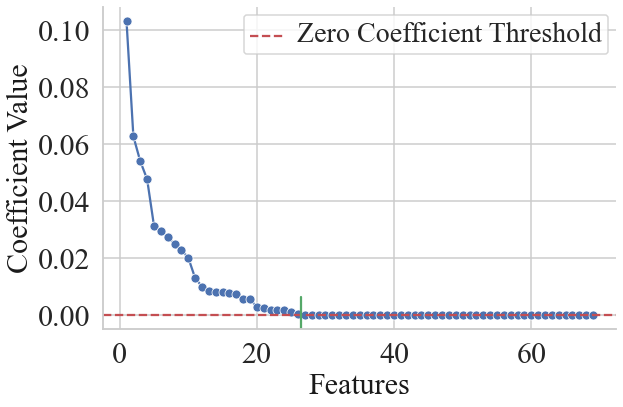

In [107]:
mpl.rcParams['font.sans-serif'] = font['family']

sns.set_context("talk")
sns.set_style("whitegrid")

plt.figure(figsize=(9, 6))
sorted_coefs = np.sort(np.abs(coefs))[::-1]
nonzero = np.count_nonzero(sorted_coefs)
plot = sns.lineplot([each+1 for each in range(len(sorted_coefs))], sorted_coefs, marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Coefficient Threshold')
plt.axvline(x=nonzero+0.5, ymin=0, ymax=0.1, color='g', linestyle='-')
# plt.title('LASSO Coefficients', fontdict=font, fontsize=20)
plt.xlabel('Features', fontdict=font)  #  (sorted by absolute magnitude)
plt.ylabel('Coefficient Value', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=font['size'])

legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(28)
    text.set_fontname(font['family'])
    
sns.despine()

for text in [plot.xaxis.label, plot.yaxis.label]:
    text.set_fontsize(30)
    text.set_fontname(font['family'])

for item in plot.get_xticklabels() + plot.get_yticklabels():
    item.set_fontsize(30)
    item.set_fontname(font['family'])

plt.tight_layout()

plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1/lasso_coefficients.tif', dpi=300, format='tiff')

plt.show()

In [108]:
# Selection process for plotting alpha
# lasso_cv.alphas_ contains all tested alpha values
# lasso_cv.mse_path_ contains the error of the test at each alpha
mean_mse = np.mean(lasso_cv.mse_path_, axis=1)
std_mse = np.std(lasso_cv.mse_path_, axis=1)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


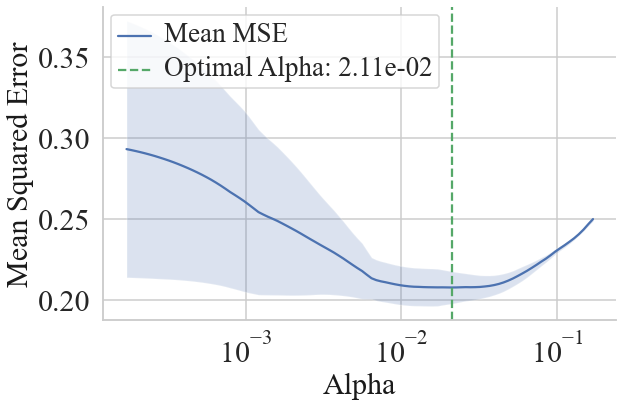

In [144]:
# Draw the alpha selection process and label the location of the best alpha value
# Set the global font to the font inside the font
mpl.rcParams['font.sans-serif'] = font['family']

sns.set_context("talk")
sns.set_style("whitegrid")

plt.figure(figsize=(9, 6))
sns.lineplot(lasso_cv.alphas_, mean_mse, label='Mean MSE')
plt.fill_between(lasso_cv.alphas_, mean_mse - std_mse, mean_mse + std_mse, alpha=0.2) # , label='MSE Standard Deviation'
plt.axvline(x=alpha, color='g', linestyle='--', label=f'Optimal Alpha: {alpha:.2e}')
plt.xscale('log')
plt.xlabel('Alpha', fontdict=font)
plt.ylabel('Mean Squared Error', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=font['size'])
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(27)
    text.set_fontname(font['family'])
    
sns.despine() 
ax = plt.gca()
for text in [ax.xaxis.label, ax.yaxis.label]:
    text.set_fontsize(30)
    text.set_fontname(font['family'])

for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(30)
    item.set_fontname(font['family'])

plt.tight_layout()
plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1/lasso_cv_results.tif', dpi=300, format='tiff')

plt.show()

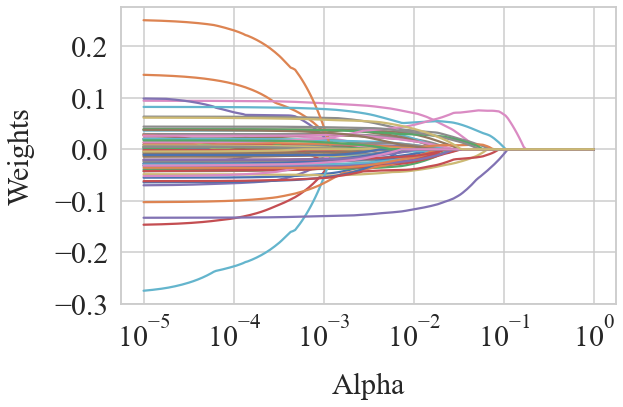

In [143]:
n_alphas = 200
alphas = np.logspace(-5, 0, n_alphas)

lasso1 = Lasso(random_state=42, max_iter=50000)

coefs1 = []

for a in alphas:
    lasso1.set_params(alpha=a)
    lasso1.fit(X, y)
    coefs1.append(lasso1.coef_)

plt.figure(figsize=(9, 6))
ax = plt.gca()

ax.plot(alphas, coefs1)
ax.set_xscale('log')


plt.xlabel('Alpha', fontname="Arial", labelpad=20)
plt.ylabel('Weights', fontname="Arial", labelpad=20)
# plt.title('Lasso coefficients as a function of the regularization', fontname="Arial", pad=20)

for text in [ax.xaxis.label, ax.yaxis.label]:
    text.set_fontsize(30)
    text.set_fontname(font['family'])

for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(30)
    item.set_fontname(font['family'])


plt.axis('tight')
plt.tight_layout()

plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1/lasso_coefficients_distribution.tif', dpi=300, format='tiff')

plt.show()